In [1]:
import pandas as pd
import numpy as np
import math
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata

In [2]:
client = Socrata(
        domain = "data.cdc.gov",
        app_token = "bsYMLkKAQhIIVd7wzBzp5BiCR",
        timeout=10
)
results = client.get_all("unsk-b7fc")

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
df.sample(10)

,date,mmwr_week,location,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_unk_manuf,dist_per_100k,distributed_per_100k_12plus,...,administered_dose1_recip_5pluspop_pct,series_complete_5plus,series_complete_5pluspop_pct,administered_5plus,admin_per_100k_5plus,distributed_per_100k_5plus,series_complete_moderna_5plus,series_complete_pfizer_5plus,series_complete_janssen_5plus,series_complete_unk_manuf_5plus
12596,2021-07-09T00:00:00.000,27,UT,3258700,172400,1384220,1702080,0,101645,125709,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3294,2021-11-29T00:00:00.000,48,RI,2020495,86000,764080,1170415,0,190728,217845,...,87.5,767733,76.4,1743173,173478,201076,274935,436269,56246,283
23622,2021-01-12T00:00:00.000,2,IA,208875,0,0,0,0,6620,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
18504,2021-04-10T00:00:00.000,14,MD,4475360,306700,1936300,2232360,0,74026,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
954,2022-01-04T00:00:00.000,1,MO,9882695,410500,3521460,5950735,0,161023,188755,...,66.5,3258977,56.5,8113613,140633,171297,1124926,1905214,228247,590
13021,2021-07-02T00:00:00.000,26,AR,2846050,178900,1285380,1381770,0,94309,111293,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
21107,2021-02-22T00:00:00.000,8,WY,150905,0,0,0,0,26074,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
12425,2021-07-11T00:00:00.000,28,MP,72330,2600,20200,49530,0,127158,148901,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
18368,2021-04-12T00:00:00.000,15,MI,7025100,482600,3075400,3467100,0,70343,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
24174,2021-01-03T00:00:00.000,1,IH2,141750,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.columns
df.dtypes

date                               object
mmwr_week                          object
location                           object
distributed                        object
distributed_janssen                object
                                    ...  
distributed_per_100k_5plus         object
series_complete_moderna_5plus      object
series_complete_pfizer_5plus       object
series_complete_janssen_5plus      object
series_complete_unk_manuf_5plus    object
Length: 80, dtype: object

In [4]:
# removing all distribution cols
# removing "Administered", total for 1st dose and complete series
# removing admin unknown manufacturer, not within project scope
# removing all 5plus cols, very recently approved and sporadic across states
# remove additional doses for 50plus, age group doesn't show up elsewhere in dataset

# df = df.drop(columns= ["MMWR_week","Distributed", "Distributed_Janssen", "Distributed_Moderna", 
#                        "Distributed_Pfizer", "Distributed_Unk_Manuf", "Dist_Per_100K","Distributed_Per_100k_12Plus",
#                        "Distributed_Per_100k_18Plus", "Distributed_Per_100k_65Plus", "Distributed_Per_100k_5Plus",
#                        "Administered", "Administered_Unk_Manuf", "Series_Complete_Unk_Manuf",
#                        "Series_Complete_Unk_Manuf_12Plus", "Series_Complete_Unk_Manuf_18Plus", "Series_Complete_Unk_Manuf_65Plus",
#                        "Additional_Doses_Unk_Manuf", "Administered_Dose1_Recip_5Plus", "Administered_Dose1_Recip_5PlusPop_Pct",
#                        "Series_Complete_5Plus", "Series_Complete_5PlusPop_Pct", "Administered_5Plus",
#                        "Admin_Per_100k_5Plus", "Series_Complete_Moderna_5Plus", "Series_Complete_Pfizer_5Plus",
#                        "Series_Complete_Janssen_5Plus", "Series_Complete_Unk_Manuf_5Plus","Additional_Doses_50Plus",
#                        "Additional_Doses_50Plus_Vax_Pct"], axis=1)
# !!!!! NEED TO SCALE TOTALED COLS FOR REMOVAL OF 5PLUS, 50PLUS AND UNK MANU !!!!!!
df = df.drop(columns= ["mmwr_week","distributed", "distributed_janssen", "distributed_moderna", 
                       "distributed_pfizer", "distributed_unk_manuf", "dist_per_100k","distributed_per_100k_12plus",
                       "distributed_per_100k_18plus", "distributed_per_100k_65plus", "distributed_per_100k_5plus",
                       "administered","administered_dose1_recip_5plus",
                       "administered_dose1_recip_5pluspop_pct", "series_complete_5plus", "series_complete_5pluspop_pct", 
                       "administered_5plus", "admin_per_100k_5plus", "series_complete_moderna_5plus",
                       "series_complete_pfizer_5plus", "series_complete_janssen_5plus", "series_complete_unk_manuf_5plus",
                       "additional_doses_50plus", "additional_doses_50plus_vax_pct"], axis=1)
df.head(10)

,date,location,administered_12plus,administered_18plus,administered_65plus,administered_janssen,administered_moderna,administered_pfizer,administered_unk_manuf,admin_per_100k,...,additional_doses,additional_doses_vax_pct,additional_doses_18plus,additional_doses_18plus_vax_pct,additional_doses_65plus,additional_doses_65plus_vax_pct,additional_doses_moderna,additional_doses_pfizer,additional_doses_janssen,additional_doses_unk_manuf
0,2022-01-11T00:00:00.000,ID,0,2054334,668134,80712,848060,1124537,3009,115067,...,336425,40.5,336385,40.6,153209,62.1,147814,183693,4850,68
1,2021-10-18T00:00:00.000,CT,5229560,4837966,1335406,208533,1887938,3133626,1206,146729,...,0,0,0,0,0,0,0,0,0,0
2,2021-10-18T00:00:00.000,LTC,0,0,0,29253,2056040,5966655,7156,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-10-12T00:00:00.000,RP,31431,28823,3581,2333,24510,4588,0,175524,...,0,0,0,0,0,0,0,0,0,0
4,2021-10-18T00:00:00.000,AL,4709330,4465853,1417185,140268,2043337,2526032,138,96055,...,0,0,0,0,0,0,0,0,0,0
5,2021-10-10T00:00:00.000,BP2,232129,232129,6948,11736,94059,126325,11,0,...,0,0,0,0,0,0,0,0,0,0
6,2021-10-18T00:00:00.000,MS,2897501,2727539,843879,74261,1174547,1647139,1848,97367,...,0,0,0,0,0,0,0,0,0,0
7,2021-10-18T00:00:00.000,WV,1579895,1507002,565744,42030,701986,836445,397,88210,...,0,0,0,0,0,0,0,0,0,0
8,2021-10-18T00:00:00.000,OK,4344206,4075392,1189729,123474,1752353,2467854,805,109793,...,0,0,0,0,0,0,0,0,0,0
9,2021-10-18T00:00:00.000,ME,1888720,1775097,575438,119378,747877,1020318,1271,140517,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# abbreviating column names for readability
# cols in api data are labelled differently than csv directly from data.cdc.gov, values match up so renaming those cols

rename_cols = {"administered_12plus":"admin_12plus", 
               "administered_18plus":"admin_18plus",
               "administered_65plus":"admin_65plus",
               "administered_janssen":"admin_janssen",
               "administered_moderna":"admin_moderna",
               "administered_pfizer":"admin_pfizer",
               "administered_unk_manuf":"admin_unk",
               "recip_administered":"recip_admin",
               "administered_dose1_recip":"admin_dose1",
               "administered_dose1_pop_pct":"admin_dose1_pop_pct",
               "administered_dose1_recip_1":"admin_dose1_12plus",
               "administered_dose1_recip_2":"admin_dose1_12plus_pop_pct",
               "administered_dose1_recip_3":"admin_dose1_18plus",
               "administered_dose1_recip_4":"admin_dose1_18plus_pop_pct",
               "administered_dose1_recip_5":"admin_dose1_65plus",
               "administered_dose1_recip_6":"admin_dose1_65plus_pop_pct",
               "series_complete_yes":"series_complete",
               "series_complete_12pluspop":"series_complete_12plus_pop_pct",
               "series_complete_18pluspop":"series_complete_18plus_pop_pct",
               "series_complete_65pluspop":"series_complete_65plus_pop_pct",
               "series_complete_unk_manuf":"series_complete_unk",
               "series_complete_unk_manuf_1":"series_complete_unk_12plus",
               "series_complete_unk_manuf_2":"series_complete_unk_18plus",
               "series_complete_unk_manuf_3":"series_complete_unk_65plus",
               "series_complete_12pluspop_pct":"series_complete_12plus_pop_pct",
               "series_complete_18pluspop_pct":"series_complete_18plus_pop_pct",
               "series_complete_65pluspop_pct":"series_complete_65plus_pop_pct"
               }
df = df.rename(columns=rename_cols)

In [6]:
# show cols with NaNs
# cols with NaNs are additional dose cols, after investigating this happens when other additional dose cols are 0
df.columns[df.isnull().any()]

Index(['additional_doses', 'additional_doses_vax_pct',
       'additional_doses_18plus', 'additional_doses_18plus_vax_pct',
       'additional_doses_65plus', 'additional_doses_65plus_vax_pct',
       'additional_doses_moderna', 'additional_doses_pfizer',
       'additional_doses_janssen', 'additional_doses_unk_manuf'],
      dtype='object')

In [7]:
# replace NaNs with 0 to fill in values
nan_col = ['additional_doses', 'additional_doses_vax_pct',
           'additional_doses_18plus', 'additional_doses_18plus_vax_pct',
           'additional_doses_65plus', 'additional_doses_65plus_vax_pct',
           'additional_doses_moderna', 'additional_doses_pfizer',
           'additional_doses_janssen', 'additional_doses_unk_manuf']
df[nan_col] = df[nan_col].fillna(0)

In [8]:
to_int = ['admin_12plus', 'admin_18plus', 'admin_65plus','admin_janssen',
          'admin_moderna', 'admin_pfizer', 'admin_unk','admin_per_100k',
          'admin_per_100k_12plus', 'admin_per_100k_18plus','admin_per_100k_65plus',
          'recip_admin', 'admin_dose1', 'admin_dose1_12plus', 'admin_dose1_18plus',
          'admin_dose1_65plus', 'series_complete_12plus', 'series_complete_18plus',
          'series_complete','series_complete_65plus', 'series_complete_janssen', 'series_complete_moderna',
          'series_complete_pfizer','series_complete_unk', 'series_complete_janssen_12plus',
          'series_complete_moderna_12plus', 'series_complete_pfizer_12plus', 'series_complete_unk_12plus',
          'series_complete_janssen_18plus', 'series_complete_moderna_18plus', 'series_complete_pfizer_18plus',
          'series_complete_unk_18plus', 'series_complete_janssen_65plus', 'series_complete_moderna_65plus',
          'series_complete_pfizer_65plus', 'series_complete_unk_65plus', 'additional_doses',
          'additional_doses_18plus', 'additional_doses_65plus', 'additional_doses_moderna',
          'additional_doses_pfizer', 'additional_doses_janssen', 'additional_doses_unk_manuf'
         ]

to_float = ['admin_dose1_pop_pct', 'admin_dose1_12plus_pop_pct', 'admin_dose1_18plus_pop_pct',
            'admin_dose1_65plus_pop_pct', 'series_complete_pop_pct', 'series_complete_12plus_pop_pct',
            'series_complete_12plus_pop_pct', 'series_complete_18plus_pop_pct', 'series_complete_65plus_pop_pct',
            'additional_doses_vax_pct', 'additional_doses_18plus_vax_pct', 'additional_doses_65plus_vax_pct'
           ]

df[to_int] = df[to_int].astype("int")
df[to_float] = df[to_float].astype("float")

In [9]:
# removing locations outside of the contential united states as well as united states total

drop_location = ["AS", "BP2", "DD2", "FM", "GU",
                 "IH2", "MH", "MP", "PR", "RP",
                 "US", "VA2", "VI", "LTC"]
df = df[~df["location"].isin(drop_location)]

# checking that location vals = 51, including DC

df.location.nunique()

51

In [10]:
# converting "date" column to datetime
df["date"] = pd.to_datetime(df["date"])
# df.dtypes
# df

In [11]:
# filter location to New York
df_ny = df.loc[df["location"] == "NY"]

In [12]:
# set index to date to extract rows for the first of each month, aligns with how other datasets are reported
df_ny_m = df_ny.set_index("date")
df_ny_m = df_ny_m.groupby(df_ny_m.index.strftime("%Y-%m")).tail(1)
df_ny_m.head(14)

,location,admin_12plus,admin_18plus,admin_65plus,admin_janssen,admin_moderna,admin_pfizer,admin_unk,admin_per_100k,admin_per_100k_12plus,...,additional_doses,additional_doses_vax_pct,additional_doses_18plus,additional_doses_18plus_vax_pct,additional_doses_65plus,additional_doses_65plus_vax_pct,additional_doses_moderna,additional_doses_pfizer,additional_doses_janssen,additional_doses_unk_manuf
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,NY,33729902,31773550,7970310,1348370,12653266,20488081,15751,177374,201094,...,4686613,33.5,4648178,36.3,1719843,58.7,2082738,2522950,80678,247
2021-12-01,NY,29780989,27946653,7038182,1245561,11046085,17722694,11816,154348,177551,...,2053051,15.4,2051249,16.5,992302,34.6,876774,1149165,27072,40
2021-11-01,NY,27672902,25904827,6358360,1179846,10090429,16394605,10689,142265,164983,...,785287,6.0,784264,6.5,469195,16.6,187754,593410,4102,21
2021-10-01,NY,25961184,24306764,5831882,1127289,9695417,15131586,9364,133465,154778,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2021-09-01,NY,24426700,22985019,5633411,1072305,9356997,13991672,7909,125575,145629,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2021-08-01,NY,22995942,21813875,5488352,1013560,9040360,12937436,6485,118219,137099,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2021-07-01,NY,21849369,20873295,5370845,948791,8743524,12153595,5114,112324,130263,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2021-06-01,NY,19706068,19188844,5168904,828036,8151594,10723586,4162,101305,117485,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2021-05-01,NY,0,15705472,4733041,603095,6819234,8433328,2942,81520,0,...,0,0.0,0,0.0,0,0.0,0,0,0,0


In [13]:
# first and most recent dates for vax reported data, updated daily
print(df_ny["date"].min())
print(df_ny["date"].max())

2020-12-14 00:00:00
2022-01-11 00:00:00


<AxesSubplot:xlabel='date'>

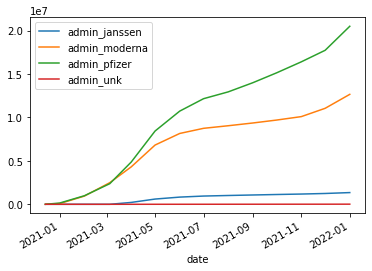

In [14]:
# trend in administration of each vax manufacturer 
ny_m_plt = df_ny_m.reset_index()
ny_m_plt.plot(x="date", y=["admin_janssen", "admin_moderna", "admin_pfizer", "admin_unk"], kind="line")

In the "Rates of COVID-19 Vaccine Administration by Manufacturer" graph, above, Pfizer and Moderna are the most administered vaccines with Pfizer being the highest. Rates of J&J and vaccines by an unknown manufacturer are very low compared to Pfizer and Moderna. The J&J vaccine has a steady and slow upwards trend as the year progresses.

---

<AxesSubplot:title={'center':'Rate of COVID-19 Vaccine Administration by Age Group'}, xlabel='date'>

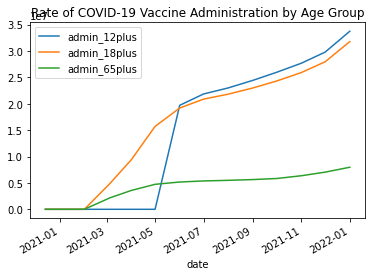

In [15]:
ny_m_plt.plot(x="date", y=["admin_12plus", "admin_18plus", "admin_65plus"], kind="line", title="Rate of COVID-19 Vaccine Administration by Age Group")

In the "Rates of COVID-19 Vaccine Administration by Age Group" graph, above, age group 18plus is the most vaccinated until 12plus spikes in May of 2021 and passes 18plus shortly after. Age group 65plus remains the lowest with a sharp increase in March of 2021 and has been steadily increasing since then. However, this graph only tells part of the story. We should look into the percent of population per each age group to get a better understanding of vaccination trends.

---

<AxesSubplot:title={'center':'Rates of COVID-19 Vaccine Administration by 100k per Age Group'}, xlabel='date'>

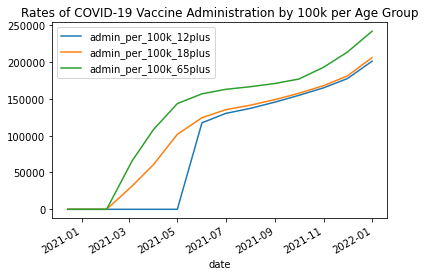

In [16]:
ny_m_plt.plot(x="date", y=["admin_per_100k_12plus", "admin_per_100k_18plus", "admin_per_100k_65plus"], kind="line", title="Rates of COVID-19 Vaccine Administration by 100k per Age Group")

Comparing the "Rates of COVID-19 Vaccine Administration by 100k per Age Group" graph to the graph showing only the value counts for each age group reveals new insights. In the per 100k graph, the 65plus age group remains the highest vaccinated group by a good margin throughout the reported timeframe. Once people 12plus were able to get vaccinated in May 2021 the rate of vaccination for this group rose almost immediately and lies just below the rate of the 18plus group.

---

<AxesSubplot:xlabel='date'>

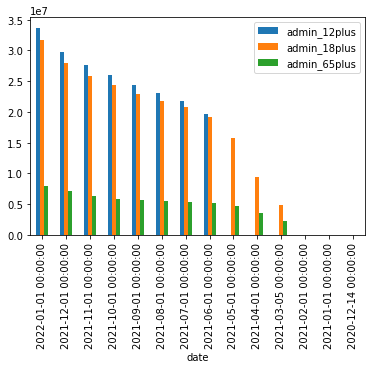

In [17]:
ny_m_plt.plot.bar(x="date", y=["admin_12plus", "admin_18plus", "admin_65plus"])